# Explore here

In [27]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.sqrt(4)

2.0

In [5]:
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_test.csv")
test_survived_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/gender_submission.csv")
test_data["Survived"] = test_survived_data["Survived"]

total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data.drop(columns = ["index"], inplace = True)
total_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [7]:
total_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
total_data['Survived'].value_counts()

Survived
0    815
1    494
Name: count, dtype: int64

In [11]:
total_data['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

## Feature Engineering:
### The engineering or creation or manipulation of features (variables) to satisfy some aspect of the project or prediction task

In [12]:
total_data['Survived'] = total_data['Survived'].astype('category')

total_data['Pclass'] = total_data['Pclass'].astype('category')

In [13]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     1309 non-null   category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
dtypes: category(2), float64(2), int64(3), object(5)
memory usage: 105.2+ KB


In [14]:
total_data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,29.881138,0.498854,0.385027,33.295479
std,378.020061,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,80.000000,8.000000,9.000000,512.329200


In [18]:
total_data[['Survived','Pclass']]

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
1304,0,3
1305,1,1
1306,0,3
1307,0,3


In [20]:
total_data.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [22]:
total_data['Cabin'].value_counts()

Cabin
C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
C22 C26            4
                  ..
E39 E41            1
B52 B54 B56        1
C39                1
B24                1
D40                1
Name: count, Length: 186, dtype: int64

In [24]:
#remove the "Cabin" variable from the dataframe

total_data = total_data.drop(columns=['Cabin'])

In [25]:
total_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [26]:
total_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

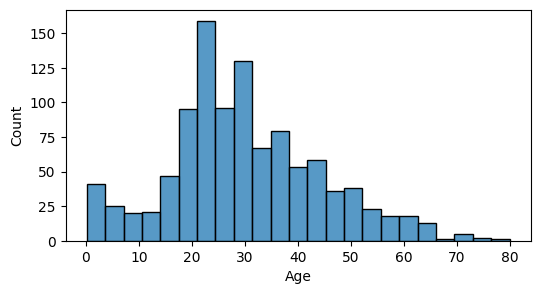

In [29]:
plt.figure(figsize=(6,3))
sns.histplot(total_data['Age'])

In [33]:
median_age = total_data['Age'].median()

total_data['Age'] = total_data['Age'].fillna(median_age)

In [35]:
total_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
dtype: int64

<Axes: xlabel='Fare', ylabel='Count'>

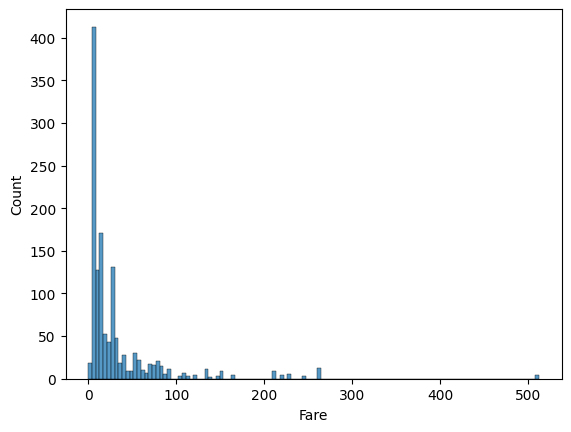

In [36]:
sns.histplot(total_data['Fare'])

In [38]:
total_data.dropna(inplace=True)

In [40]:
total_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [44]:
total_data.reset_index(drop=True, inplace=True)

In [45]:
total_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1301,1305,0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S
1302,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1303,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1304,1308,0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S


In [49]:
total_data.drop(columns=['Name', 'Ticket', 'Parch', 'PassengerId'], inplace=True)

In [51]:
total_data

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
1301,0,3,male,28.0,0,8.0500,S
1302,1,1,female,39.0,0,108.9000,C
1303,0,3,male,38.5,0,7.2500,S
1304,0,3,male,28.0,0,8.0500,S


## Dummy Variables for Categorical Data

In [58]:
total_data = pd.get_dummies(total_data, dtype='int', drop_first=True)

In [59]:
total_data

,Age,SibSp,Fare,Survived_1,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,7.2500,0,0,1,1,0,1
1,38.0,1,71.2833,1,0,0,0,0,0
2,26.0,0,7.9250,1,0,1,0,0,1
3,35.0,1,53.1000,1,0,0,0,0,1
4,35.0,0,8.0500,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1301,28.0,0,8.0500,0,0,1,1,0,1
1302,39.0,0,108.9000,1,0,0,0,0,0
1303,38.5,0,7.2500,0,0,1,1,0,1
1304,28.0,0,8.0500,0,0,1,1,0,1


## Build a Classification Model

1. Split the data into Predictors (X) and target (y)
2. Split the data into Training and Testing sets
3. Train a Logistic Regression model on the training datasets
4. Make predictions using the testing dataset

In [60]:
y = total_data['Survived_1']

X = total_data.drop(columns=['Survived_1'])

In [61]:
#predictor matrix / dataframe
X

,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,7.2500,0,1,1,0,1
1,38.0,1,71.2833,0,0,0,0,0
2,26.0,0,7.9250,0,1,0,0,1
3,35.0,1,53.1000,0,0,0,0,1
4,35.0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...
1301,28.0,0,8.0500,0,1,1,0,1
1302,39.0,0,108.9000,0,0,0,0,0
1303,38.5,0,7.2500,0,1,1,0,1
1304,28.0,0,8.0500,0,1,1,0,1


In [62]:
#y is the target variable
y

0       0
1       1
2       1
3       1
4       0
       ..
1301    0
1302    1
1303    0
1304    0
1305    0
Name: Survived_1, Length: 1306, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

In [78]:
#split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


In [82]:
y_train.shape

(1044,)

In [83]:
y_test.shape

(262,)

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
#instantiate the model
logreg = LogisticRegression()

In [86]:
#fit the model with training data
#also called "training the model"
logreg.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
#make predictions using logreg model
test_preds = logreg.predict(X_test)

test_preds

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [93]:
y_test

260     1
120     0
172     0
1197    1
828     1
       ..
874     0
256     1
901     1
936     0
703     0
Name: Survived_1, Length: 262, dtype: int64

In [99]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Confusion matrix will tell me 4 possibilities:
* Actual 0 and Predicted 0
* Actual 0 and Predicted 1
* Actual 1 and Predicted 0
* Actual 1 and Predicted 1

In [95]:
confusion_matrix(y_true = y_test, y_pred = test_preds)

array([[152,  21],
       [ 19,  70]])

In [102]:
#this tells me my "Actual 0 and 1" are on the vertical (y) axis of the confusion matrix
y_test.value_counts()

Survived_1
0    173
1     89
Name: count, dtype: int64

In [105]:
#this tells me my "Predicted 0 and 1" are on the horizontal (x) axis
pd.Series(test_preds).value_counts()

0    171
1     91
Name: count, dtype: int64

| . | Pred 0    | Pred 1 |
| - | -------- | ------- |
|Actual 0| 152  | 21   |
|Actual 1| 19 | 70     |


In [98]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       173
           1       0.77      0.79      0.78        89

    accuracy                           0.85       262
   macro avg       0.83      0.83      0.83       262
weighted avg       0.85      0.85      0.85       262



In [100]:
accuracy_score(y_test, test_preds)

0.8473282442748091